# Project: Investigate a Dataset (TMDB movies dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
     <ul><a href="#ob">Observations</a></ul>
    <ul><a href="#cl">Cleaning Data </a></ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul><a href="#Q1">Question 1: The profits trends from year to year.</a></ul>
    <ul><a href="#Q2">Question 2: The year that had the highest and lowest profits.</a></ul>
    <ul><a href="#Q3">Question 3: The  average profits for all movies.</a></ul>
    <ul><a href="#Q4">Question 4: The movie that had the highest and lowest profits.</a></ul>
    <ul><a href="#Q5">Question 5: The top ten movies with the highest profits.</a></ul>
    <ul><a href="#Q6">Question 6: The movie that had the highest and lowest budget.</a></ul>
    <ul><a href="#Q7">Question 7: The movie that had the longest and shortest runtime.</a></ul>
    <ul><a href="#Q8">Question 8: The average duration of the movies.</a></ul>
    <ul><a href="#Q9">Question 9: The average rate for all movies.</a></ul>
    <ul><a href="#Q10">Question 10: The top ten popular movies based on rate.</a></ul>
    <ul><a href="#Q11">Question 11: The relationship between runtime and vote average (Rating)? </a></ul>
    <ul><a href="#Q12">Question 12: The most successful genres with respect to the profitable movies.</a></ul>

<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#resources">Resources</a></li>
</ul>


<a id='intro'></a>
## Introduction

>

> **I choose to investigate the TMDB movies dataset for this project .**

> **According to Kaggle, this dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including their details of user ratings and revenue, budget, release dates, etc.
The dataset duration was from 1960 to 2017, based on Kaggle the data was updated one year ago.**

> **I started the investigation  by asking the following questions :**
1. What are profits trends from year to year?
2. What is the year that had the highest profits? and what is the year that had the lowest profits?
3. What is the average profits for all movies?
4. Which movie had the highest profits, and  which movie had the lowest profits?
5. What are the top ten movies with the highest profits?
6. Which movie had the highest budget, and which movie had the lowest budget?
7. Which movie had the longest and shortest runtime?
8. What is the average duration of the movies?
9. What is the average rate for all movies?
10. What are the top ten popular movies based on the rate?
11. What is the relationship between runtime and vote average (Rating)?
12. What are the most successful genres with respect to the profitable movies ?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
# Importe all the neccessary libraries/files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

# For making sure that all the data visualisations are plotted inline with the notebook.
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

**In this step, we will load the data so we can explore it and decide how to clean it in the next step.
This will makes the analysis easer .**

### General Properties
#### Reading the data 

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#reading tmdb csv file and storing that to a variable df_tmdb
df_tmdb = pd.read_csv('tmdb-movies.csv')


#### exploring the data  dimensions

In [3]:
#exploring the number of columns and rows in the dataset
print(df_tmdb.shape)

(10866, 21)


> The TMdb dataset consists of 10866 rows and 21 columns.

#### exploring the data columns
> now let's explore the names of the columns in the dataset

In [4]:
#exploring the names of columns in the dataset
print(list(df_tmdb.columns.values))

['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']


#### Checking the first rows of the Dataset

In [5]:
#calling the first 5 rows of tmdb database
df_tmdb.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline      ...       \
0              The park is open.      ...        
1             What a Lovely Day.      ...        
2     One Choice Can Destroy You      ...        
3  Every generation has a story.      ...        
4            Vengeance Hits Home      ...        

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

<a id='ob'></a>
### Observations from the dataset

> 1. There are no unit of currency mentioned in  **'budget', 'revenue', 'budget_adj', 'revenue_adj', e.g (budget or revenue) columns.**
> Therefore, we will assume that the used currency is the US dollar ($) since it is the most used international currency.

> 2. In vote_count, the vote count for each movie is not similar to the others, this will affect the vote average.

> **In the next step we will find some basic information like data type, the number of null values in each column in the dataset by using info().**

In [6]:
#check the column info and null values in the dataset
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

<a id='cl'></a>
### Data Cleaning (Removing the unnecessary/unused data from the dataset)

> There are a few steps we need to do to remove the unnecessary data :

> 1. delete the unnecessary columns like imdb_id, overview, homepage, tagline etc..
Some of these columns have a lot of null values like homepage and tagline and they are not necessary for answering the posted questions so we decided to delete them.
>2. delete the duplicates. 
>3. delete rows with small null value. in cast, director , genres columns.
>4. Replace the zero values with Null.
I notice that there are lots of movies where the budget or revenue have a zero value, I assume that those values are missing and not recorded. Calculating the profits of these movies would lead to wrong results.
>5. Changing the format of budget and revenue column.
>6. Changing the format of release date column into date format.



> Let’s take a look at some zeros values in budget and revenue data. I used query to filter the zero budget data and revenue data.

In [7]:

#filter the zero budget data
df_budget_zero = df_tmdb.query('budget == 0')
# choose the first 5 rows randomly
df_budget_zero.head()

id    imdb_id  popularity  budget   revenue  \
30  280996  tt3168230    3.927333       0  29355203   
36  339527  tt1291570    3.358321       0  22354572   
72  284289  tt2911668    2.272044       0     45895   
74  347096  tt3478232    2.165433       0         0   
75  308369  tt2582496    2.141506       0         0   

                    original_title  \
30                      Mr. Holmes   
36                          Solace   
72                Beyond the Reach   
74          Mythica: The Darkspore   
75  Me and Earl and the Dying Girl   

                                                 cast  \
30  Ian McKellen|Milo Parker|Laura Linney|Hattie M...   
36  Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...   
72  Michael Douglas|Jeremy Irvine|Hanna Mangan Law...   
74  Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...   
75  Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...   

                                             homepage  \
30                       http://www.mrholmesfilm.com/   
36                                                NaN   
72                                                NaN   
74          http://www.mythicamovie.com/#!blank/wufvh   
75  http://www.foxsearchlight.com/meandearlandthed...   

                   director  \
30              Bill Condon   
36            Afonso Poyart   
72  Jean-Baptiste LÃ©onetti   
74            Anne K. Black   
75      Alfonso Gomez-Rejon   

                                              tagline      ...       \
30                            The man behind the myth      ...        
36  A serial killer who can see your future, a psy...      ...        
72                                                NaN      ...        
74                                                NaN      ...        
75           A Little Friendship Never Killed Anyone.      ...        

                                             overview runtime  \
30  The story is set in 1947, following a long-ret...     103   
36  A psychic doctor, John Clancy, works with an F...     101   
72  A high-rolling corporate shark and his impover...      95   
74  When Teelaâ€™s sister is murdered and a powerf...     108   
75  Greg is coasting through senior year of high s...     105   

                      genres  \
30             Mystery|Drama   
36       Crime|Drama|Mystery   
72                  Thriller   
74  Action|Adventure|Fantasy   
75              Comedy|Drama   

                                 production_companies release_date vote_count  \
30  BBC Films|See-Saw Films|FilmNation Entertainme...      6/19/15        425   
36  Eden Rock Media|FilmNation Entertainment|Flynn...       9/3/15        474   
72                                      Furthur Films      4/17/15         81   
74                           Arrowstorm Entertainment      6/24/15         27   
75                                  Indian Paintbrush      6/12/15        569   

    vote_average  release_year  budget_adj   revenue_adj  
30           6.4          2015         0.0  2.700677e+07  
36           6.2          2015         0.0  2.056620e+07  
72           5.5          2015         0.0  4.222338e+04  
74           5.1          2015         0.0  0.000000e+00  
75           7.7          2015         0.0  0.000000e+00  

[5 rows x 21 columns]

>> **1. now we will delete the unnecessary columns like imdb_id, overview, homepage, tagline etc..**


In [8]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# Drop extraneous columns

#creating a list of columb to be deleted
delete_col = ['imdb_id', 'homepage', 'tagline', 'overview', 'keywords', 'production_companies', 'budget_adj', 'revenue_adj']

#delete the columns
df_tmdb = df_tmdb.drop(delete_col, 1)

#review the new dataset
df_tmdb.head()

id  popularity     budget     revenue                original_title  \
0  135397   32.985763  150000000  1513528810                Jurassic World   
1   76341   28.419936  150000000   378436354            Mad Max: Fury Road   
2  262500   13.112507  110000000   295238201                     Insurgent   
3  140607   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4  168259    9.335014  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres release_date  \
0      124  Action|Adventure|Science Fiction|Thriller       6/9/15   
1      120  Action|Adventure|Science Fiction|Thriller      5/13/15   
2      119         Adventure|Science Fiction|Thriller      3/18/15   
3      136   Action|Adventure|Science Fiction|Fantasy     12/15/15   
4      137                      Action|Crime|Thriller       4/1/15   

   vote_count  vote_average  release_year  
0        5562           6.5          2015  
1        6185           7.1          2015  
2        2480           6.3          2015  
3        5292           7.5          2015  
4        2947           7.3          2015

**Now we need to see the how many entries of the movies and the number of the remaining columns.**

In [9]:
#presenting the number of columns and rows in the dataset
rows, col = df_tmdb.shape
#We need to reduce the count of row by one as contain header row also.
print('There are {} columns and {} entries of movie data'.format(col, rows-1))

There are 13 columns and 10865 entries of movie data


> **2. Now  we need to delete the duplicate rows if there are any**

In [10]:
#drop the duplicates but keep the first one
df_tmdb.drop_duplicates(keep = 'first', inplace=True)

> **Now let's see how many duplicates we have delete **

In [11]:
rows, col = df_tmdb.shape
#We need to reduce the count of row by one as contain header row also.
print('There are now {} columns and {} entries of movie data'.format(col, rows-1))

There are now 13 columns and 10864 entries of movie data


> 3. now delete rows with small null value. in cast, director , genres columns.

In [12]:
## delete the nan values from cast , genres , director column, keeping only movies, that has data.

df_tmdb = df_tmdb[df_tmdb["cast"].isnull() == False]
df_tmdb = df_tmdb[df_tmdb["genres"].isnull() == False]
df_tmdb = df_tmdb[df_tmdb["director"].isnull() == False]


>  Now lets see the result

In [13]:
rows, col = df_tmdb.shape
#We need to reduce the count of row by one as contain header row also.
print('There are now {} columns and {} entries of movie data'.format(col, rows-1))

There are now 13 columns and 10730 entries of movie data


> 4. now we will replace the zero values in budget and revenue with NAN.

we notice that there are lots of movies where the budget or revenue have a zero value, we assume that those values are missing and not recorded. Calculating the profits of these movies would lead to wrong results. So we decide to replace the zero value with nan.

In [14]:
rows, col = df_tmdb.shape
#We need to reduce the count of row by one as contain header row also.
print('There are now {} columns and {} entries of movie data'.format(col, rows-1))

There are now 13 columns and 10730 entries of movie data


In [15]:
# creating a seperate list of budget and revenue  columns
temp_list=['budget', 'revenue', 'runtime']

# replace all the zeros '0' value  to NAN in the list
df_tmdb[temp_list] = df_tmdb[temp_list].replace(0, np.NAN)

> 5.  Changing format of budget and revenue column.

In [16]:
#printing the data type of the data set
df_tmdb.dtypes

id                  int64
popularity        float64
budget            float64
revenue           float64
original_title     object
cast               object
director           object
runtime           float64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
dtype: object

In [17]:
change_type=['budget', 'revenue']
#changing data type
df_tmdb[change_type]=df_tmdb[change_type].apply(np.int64)
#printing the changed information
df_tmdb.dtypes

id                  int64
popularity        float64
budget              int64
revenue             int64
original_title     object
cast               object
director           object
runtime           float64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
dtype: object

> 6. Changing release date column into date format.

In [18]:
df_tmdb.release_date = pd.to_datetime(df_tmdb['release_date'])
# preview the changed dataset
df_tmdb.dtypes

id                         int64
popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
runtime                  float64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
dtype: object

> **Now let's see the result of cleaning the data set**

In [19]:
df_tmdb.head()

id  popularity     budget     revenue                original_title  \
0  135397   32.985763  150000000  1513528810                Jurassic World   
1   76341   28.419936  150000000   378436354            Mad Max: Fury Road   
2  262500   13.112507  110000000   295238201                     Insurgent   
3  140607   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4  168259    9.335014  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres release_date  \
0    124.0  Action|Adventure|Science Fiction|Thriller   2015-06-09   
1    120.0  Action|Adventure|Science Fiction|Thriller   2015-05-13   
2    119.0         Adventure|Science Fiction|Thriller   2015-03-18   
3    136.0   Action|Adventure|Science Fiction|Fantasy   2015-12-15   
4    137.0                      Action|Crime|Thriller   2015-04-01   

   vote_count  vote_average  release_year  
0        5562           6.5          2015  
1        6185           7.1          2015  
2        2480           6.3          2015  
3        5292           7.5          2015  
4        2947           7.3          2015

In [20]:
rows, col = df_tmdb.shape
#We need to reduce the count of row by one as contain header row also.
print('There are now {} columns and {} entries of movie data'.format(col, rows-1))

There are now 13 columns and 10730 entries of movie data


<a id='eda'></a>
## Exploratory Data Analysis
> **Tip**: Now after trimmed and cleaned the data, we are ready to move on to exploring the data. 
The goal is to addressing the research questions that we have posed in the Introduction section. 
> Now lest's start answering the posted quetions.

<a id='Q1'></a>
### Research Question 1 ( What are the profits trends from year to year?)

**We will start by calculating the profits of each movie.
To do that we need to insert a new column named profits then calculate the profits.

In [21]:
#Insert function with three parameters(index of the column in the dataset, name of the column, value to be inserted)
#insert new column and place it in index number 4

df_tmdb.insert(4,'profits',df_tmdb['revenue'] - df_tmdb['budget'])

#previewing the changes in the dataset
df_tmdb.head()


id  popularity     budget     revenue     profits  \
0  135397   32.985763  150000000  1513528810  1363528810   
1   76341   28.419936  150000000   378436354   228436354   
2  262500   13.112507  110000000   295238201   185238201   
3  140607   11.173104  200000000  2068178225  1868178225   
4  168259    9.335014  190000000  1506249360  1316249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres release_date  \
0    124.0  Action|Adventure|Science Fiction|Thriller   2015-06-09   
1    120.0  Action|Adventure|Science Fiction|Thriller   2015-05-13   
2    119.0         Adventure|Science Fiction|Thriller   2015-03-18   
3    136.0   Action|Adventure|Science Fiction|Fantasy   2015-12-15   
4    137.0                      Action|Crime|Thriller   2015-04-01   

   vote_count  vote_average  release_year  
0        5562           6.5          2015  
1        6185           7.1          2015  
2        2480           6.3          2015  
3        5292           7.5          2015  
4        2947           7.3          2015

**now we  have to sum  all the movies of a particular year, since we want to know the profits of movies for every year.**

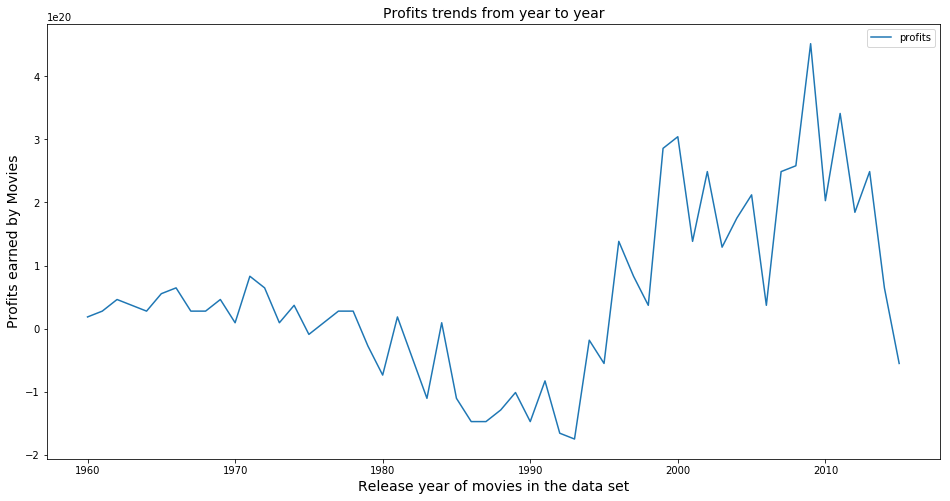

In [22]:
#We will be using Line plot for this analysis
#we will sum all the movies of a particular year

profits_year = df_tmdb.groupby('release_year')['profits'].sum()
#figure size(width, height)
plt.figure(figsize=(16,8))
#on x-axis
plt.xlabel('Release year of movies in the data set', fontsize = 14)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 14)
#title of the line plot
#Representing Total Profits earned by all movies Vs Year of their release.
plt.title('Profits trends from year to year', fontsize = 14)

#plotting the graph
plt.plot(profits_year)
#displaying the line plot
plt.legend()
plt.show()

<a id='Q2'></a>
### Research Question 2 (What is the year that had the highest  profits and what is the year that had the lowest  profits?)

> First we will see what is the year  that had the highest  profits.

In [23]:
#To find which year made the highest profits?

high_profits = profits_year.idxmax()
print('The year that had the highest profits is  {} '.format(high_profits))

The year that had the highest profits is  2009 


> Now let's see what is the year that had the lowest  profits.

In [24]:
#To find which year made the lowest profits?

low_profits = profits_year.idxmin()
print('The year that had the lowest profits is  {} .'.format(low_profits))

The year that had the lowest profits is  1993 .


<a id='Q3'></a>
### Research Question 3 (What is the average profits for all movies?)

In [25]:
# defining a function to find average of profits column
def avg_tmdb(column):
    return df_tmdb[column].mean()

In [26]:
#Calling the avrage function
avg_tmdb('profits')
print('The average profits for all movies is {} $.'.format(avg_tmdb('profits')))

The average profits for all movies is 2.6644723993092858e+17 $.


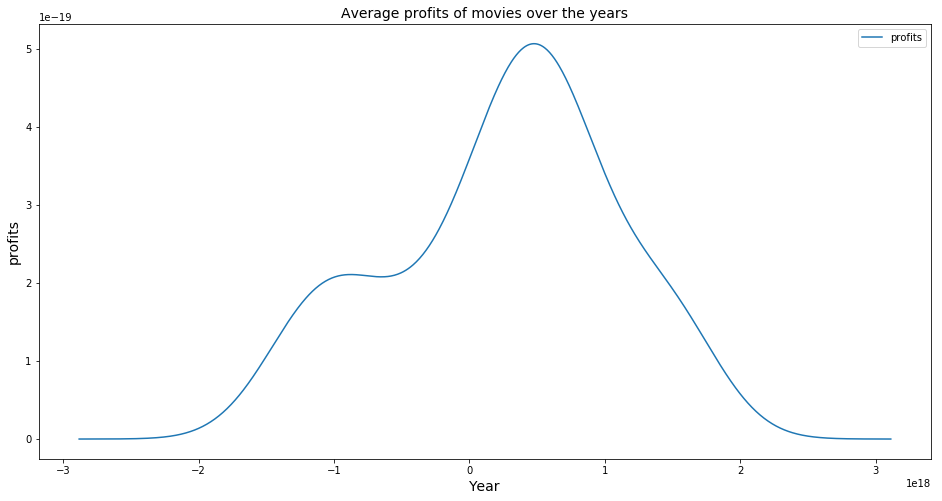

In [27]:
#presenting the visulaization of the analysis
#Kernel Density Estimation plot 
#figure size(width, height)
df_tmdb.groupby('release_year')['profits'].mean().plot(kind='kde', figsize = (16, 8))
#title of the plot
plt.title('Average profits of movies over the years', fontsize = 14)
#on x-axis
plt.xlabel('Year', fontsize = 14)
#on y-axis
plt.ylabel('profits', fontsize = 14);
#displaying the line plot
plt.legend()
plt.show()

<a id='Q4'></a>
### Research Question 4 (which movie had the highest profits, and which movie had the lowest profits?)

In [28]:
#Let's define a function which calculates lowest and highest values of columns
#taking column name as arguments
import pprint
#defining the function
def highest_lowest(column):
    #for highest earned profits
    highest= df_tmdb[column].idxmax()
    high_details=pd.DataFrame(df_tmdb.loc[highest])
    print('The movie that has the highest value is {} '.format(high_details))
    
    
    #for lowest earned profits
    lowest= df_tmdb[column].idxmin()
    low_details=pd.DataFrame(df_tmdb.loc[lowest])
    print('The movie that has the lowest value is {} '.format(low_details))
    
    #collectin data in one place   #concatenating two dataframes
    info=pd.concat([high_details, low_details], axis=1)
    return info

#calling the function
highest_lowest('profits')

    

The movie that has the highest value is                                                              1151
id                                                         287524
popularity                                               0.177102
budget                                                          1
revenue                                      -9223372036854775808
profits                                       9223372036854775807
original_title                                        Fear Clinic
cast            Thomas Dekker|Robert Englund|Cleopatra Coleman...
director                                              Robert Hall
runtime                                                        95
genres                                                     Horror
release_date                                  2014-10-31 00:00:00
vote_count                                                     15
vote_average                                                  4.1
release_year                        

1151  \
id                                                         287524   
popularity                                               0.177102   
budget                                                          1   
revenue                                      -9223372036854775808   
profits                                       9223372036854775807   
original_title                                        Fear Clinic   
cast            Thomas Dekker|Robert Englund|Cleopatra Coleman...   
director                                              Robert Hall   
runtime                                                        95   
genres                                                     Horror   
release_date                                  2014-10-31 00:00:00   
vote_count                                                     15   
vote_average                                                  4.1   
release_year                                                 2014   

                                                             1380  
id                                                          18196  
popularity                                               0.097126  
budget                                       -9223372036854775808  
revenue                                                         3  
profits                                      -9223372036854775805  
original_title                                       The Sentinel  
cast            Chris Sarandon|Cristina Raines|Martin Balsam|J...  
director                                           Michael Winner  
runtime                                                        92  
genres                                       Horror|Drama|Mystery  
release_date                                  1977-01-07 00:00:00  
vote_count                                                     14  
vote_average                                                  6.3  
release_year                                                 1977

> **The column with id 1151 shows the details of the movie with highest profits earned, which is Fear Clinic	.
> The column with id 1380 show the details of the movie with the lowest profits earned, which is The Sentinel
.

<a id='Q5'></a>
### Research Question 5  (What are the top ten movies with the highest profits?)

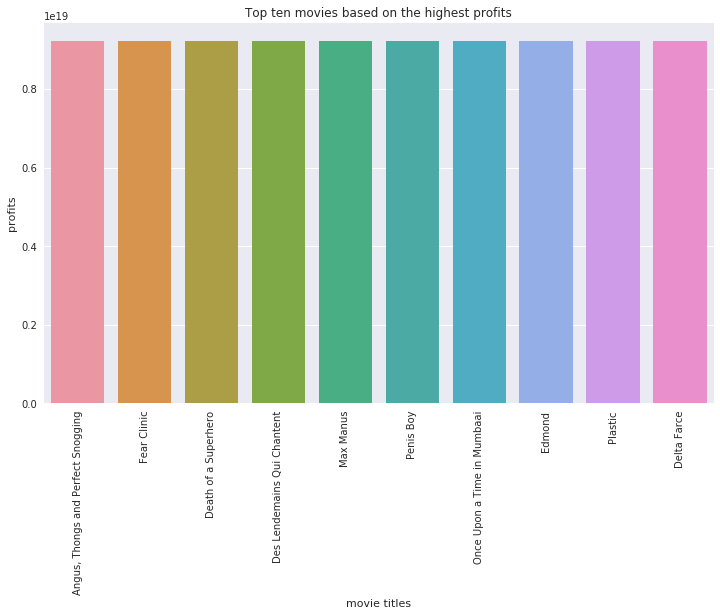

In [29]:
#Top ten movies with the highest profit
top_profit = df_tmdb[['original_title','profits']]
#figure size(width, height)
sns.set(rc={'figure.figsize':(12,7)}, font_scale=1)

ax = sns.barplot(
    top_profit.sort_values(by="profits", ascending=False).head(10).original_title, 
    top_profit.sort_values(by="profits", ascending=False).head(10).profits)

#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(90)
#on x-axis and y-axis and #title of the line plot
ax.set(xlabel='movie titles', ylabel='profits', title = 'Top ten movies based on the highest profits')
#displaying the line plot
plt.show()


 > The top ten movies with the highest profits are : Angues Thongs and Perfect Snogging, Fear Clinic, Death of a Superhero, Des Lendemains Qui Chantent, Max Manus, Penis Boy, Once upon a Time in Mumbaai, Edmond , Plastic and Delta Farce.

<a id='Q6'></a>
### Research Question 6 (Which movie had the highest budget, and which movie had the lowest budget?)

In [30]:
#calling the function highest_lowest to find out the movie with the highest budget and the movie with lowest budget
highest_lowest('budget')

The movie that has the highest value is                                                              2244
id                                                          46528
popularity                                                0.25054
budget                                                  425000000
revenue                                                  11087569
profits                                                -413912431
original_title                                  The Warrior's Way
cast            Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                               Sngmoo Lee
runtime                                                       100
genres                  Adventure|Fantasy|Action|Western|Thriller
release_date                                  2010-12-02 00:00:00
vote_count                                                     74
vote_average                                                  6.4
release_year                        

2244  \
id                                                          46528   
popularity                                                0.25054   
budget                                                  425000000   
revenue                                                  11087569   
profits                                                -413912431   
original_title                                  The Warrior's Way   
cast            Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...   
director                                               Sngmoo Lee   
runtime                                                       100   
genres                  Adventure|Fantasy|Action|Western|Thriller   
release_date                                  2010-12-02 00:00:00   
vote_count                                                     74   
vote_average                                                  6.4   
release_year                                                 2010   

                                                             30    
id                                                         280996  
popularity                                                3.92733  
budget                                       -9223372036854775808  
revenue                                                  29355203  
profits                                      -9223372036825420605  
original_title                                         Mr. Holmes  
cast            Ian McKellen|Milo Parker|Laura Linney|Hattie M...  
director                                              Bill Condon  
runtime                                                       103  
genres                                              Mystery|Drama  
release_date                                  2015-06-19 00:00:00  
vote_count                                                    425  
vote_average                                                  6.4  
release_year                                                 2015

> **The column with id 2244 shows the details of the movie with highest budget which is The Warrior's Way	 .
> The column with id 30 show the details of the movie with the lowest budget which is Mr. Holmes.**

<a id='Q7'></a>
### Research Question 7 : What is the movies with longest and shortest runtime?

In [31]:
# calling the function highest_lowest to find out the movie with the longest and shortest runtime
highest_lowest('runtime')

The movie that has the highest value is                                                              3894
id                                                         125336
popularity                                               0.006925
budget                                       -9223372036854775808
revenue                                      -9223372036854775808
profits                                                         0
original_title                      The Story of Film: An Odyssey
cast            Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...
director                                             Mark Cousins
runtime                                                       900
genres                                                Documentary
release_date                                  2011-09-03 00:00:00
vote_count                                                     14
vote_average                                                  9.2
release_year                        

3894  \
id                                                         125336   
popularity                                               0.006925   
budget                                       -9223372036854775808   
revenue                                      -9223372036854775808   
profits                                                         0   
original_title                      The Story of Film: An Odyssey   
cast            Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...   
director                                             Mark Cousins   
runtime                                                       900   
genres                                                Documentary   
release_date                                  2011-09-03 00:00:00   
vote_count                                                     14   
vote_average                                                  9.2   
release_year                                                 2011   

                                                 1112  
id                                             264170  
popularity                                   0.202776  
budget                           -9223372036854775808  
revenue                          -9223372036854775808  
profits                                             0  
original_title                   Batman: Strange Days  
cast            Kevin Conroy|Brian George|Tara Strong  
director                                   Bruce Timm  
runtime                                             3  
genres                               Action|Animation  
release_date                      2014-04-09 00:00:00  
vote_count                                         20  
vote_average                                      7.6  
release_year                                     2014

> **Column with id 3894 shows the movie with the longest runtime which is The Story of Film: An Odyssey	 for 900 minutes.
> The column with id 1112 shows the movie with the shortest runtime which is Batman: Strange Days
 for 3 minutes. **

<a id='Q8'></a>
### Research Question  8:  What is the average runtime of the movies over the years?

In [32]:
#Calling the avrage function to calculate the avrage runtime of the movies over the years
avg_tmdb('runtime')
print('The average duration for all movies is {} minutes.'.format(avg_tmdb('runtime')))

The average duration for all movies is 102.73689619732785 minutes.


In [33]:
#getting runtime describtion
df_tmdb['runtime'].describe()

count    10703.000000
mean       102.736896
std         30.079331
min          3.000000
25%         90.000000
50%         99.000000
75%        112.000000
max        900.000000
Name: runtime, dtype: float64

> Now lets see the analysis it in a visual form  We will start with the line plot.

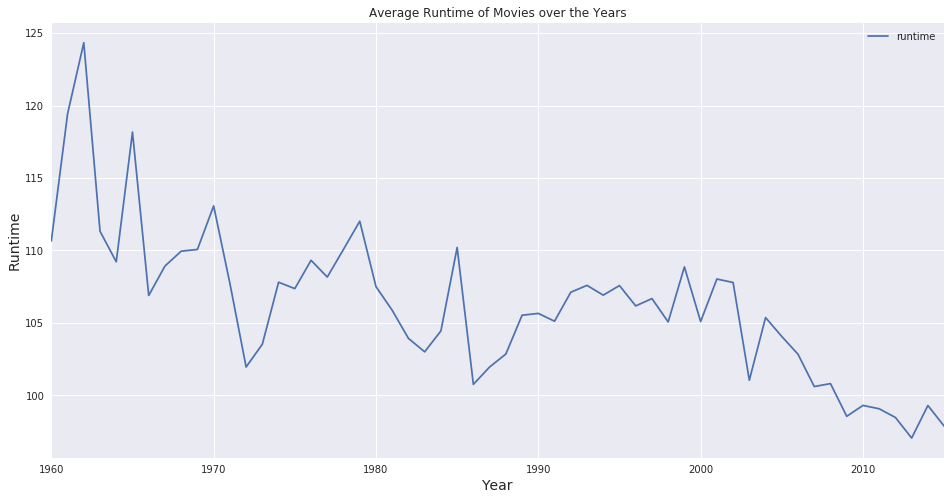

In [34]:
#presenting the visulaization of the analysis
#figure size(width, height)
df_tmdb.groupby('release_year')['runtime'].mean().plot(kind='line', figsize = (16, 8))
#title of the line plot
plt.title('Average Runtime of Movies over the Years')
#on x-axis
plt.xlabel('Year', fontsize = 14)
#on y-axis
plt.ylabel('Runtime', fontsize = 14);
#displaying the line plot
plt.legend()
plt.show()


>**Now let's analyse more about runtime of the movie by using different kind of plots 

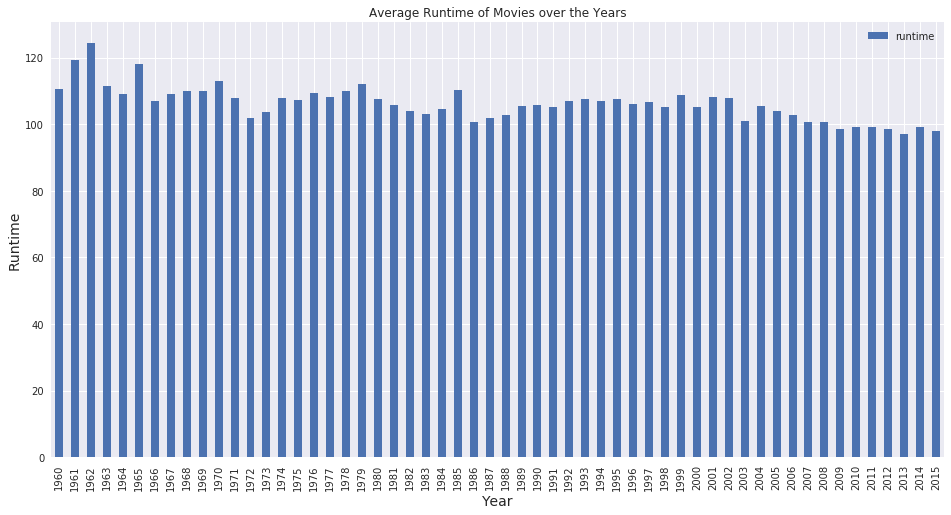

In [35]:
#bar plot
#figure size(width, height)
df_tmdb.groupby('release_year')['runtime'].mean().plot(kind='bar', figsize = (16, 8))
#title of the plot
plt.title('Average Runtime of Movies over the Years')
#on x-axis
plt.xlabel('Year', fontsize = 14)
#on y-axis
plt.ylabel('Runtime', fontsize = 14);
#displaying the line plot
plt.legend()
plt.show()


> We can see that the distribution of the above formed graphs is positively skewed or right skewed.
> Most of the movies are timed between 90 to 119 minutes. 

>By looking at both the plot and calculations, we can conclude that
> 1. 25% of movies have a runtime of less than 95 minutes.
> 2. 50% of movies have a runtime of less than 109 minutes. (median)
> 3. 75% of movies have a runtime of less than 119 minutes.
which is the same results we got by using describe.

<a id='Q9'></a>
### Research Question  9 :  What is the average rating of the movies over the years?

In [36]:
#Calling the avrage function
avg_tmdb('vote_average')
print('The average rating for all movies is {} .'.format(avg_tmdb('vote_average')))

The average rating for all movies is 5.96470971950424 .


<a id='Q10'></a>
### Research Question  10 :  What are the top ten movies with the highest rating (vote average)?

> now we will see the visulisation of the top ten movies with the highest rating by usint the bar plot

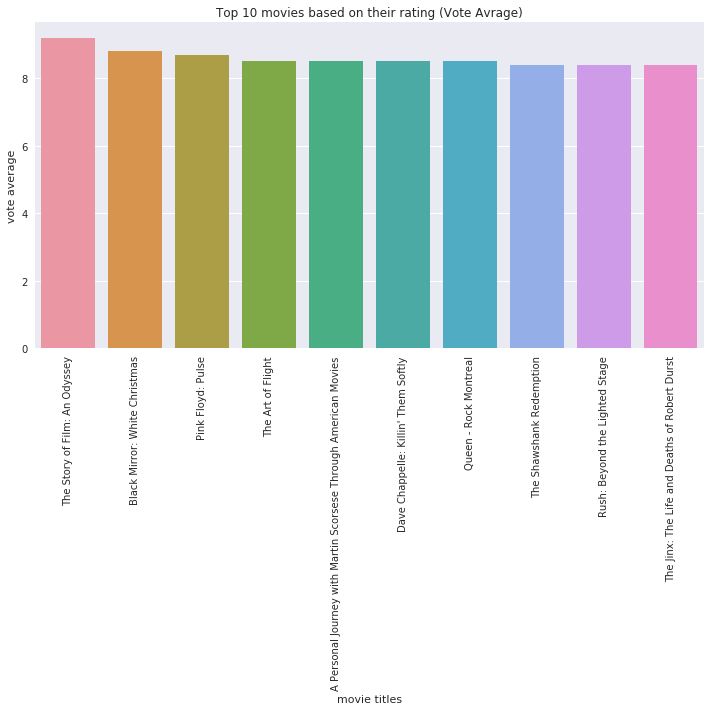

In [37]:
#Top ten movies with the highest rating (vote average)

top_rating = df_tmdb[['original_title','vote_average']]
#figure size(width, height) 
sns.set(rc={'figure.figsize':(12,6)})

ax = sns.barplot(top_rating.sort_values(by="vote_average", ascending=False).head(10).original_title, 
                top_rating.sort_values(by="vote_average", ascending=False).head(10).vote_average)

#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(90)
#on x-axis and  y-axis , #title of the plot
ax.set(xlabel='movie titles', ylabel='vote average', title = 'Top 10 movies based on their rating (Vote Avrage)')
#displaying the line plot
plt.show()


> The top ten movies with the highest rating (vote average) are : The story of Film: An Odyssey, Black Mirror : White Christmas, Pink Floyd: Pulse, The At of Flight, A Personal Journey with Martin Scorsese Through American Movies, Dave Chappelle: Killin' Them Softly, Queen-Rock Montreal, The Shawshank Redemption, Rush: Beyond the Lighted Stage, The Jinx: The Life and Deaths of Robert Durst.

<a id='Q11'></a>
### Research Question 11 (What is the relationship between runtime and vote average (Rating)?)

In [38]:
# We Will use corr to compute the correlation of columns
df_tmdb.corr()

id  popularity    budget   revenue   profits   runtime  \
id            1.000000   -0.009464 -0.207813 -0.204751 -0.004192 -0.074545   
popularity   -0.009464    1.000000  0.327450  0.355368 -0.028673  0.136339   
budget       -0.207813    0.327450  1.000000  0.571011  0.466507  0.143962   
revenue      -0.204751    0.355368  0.571011  1.000000 -0.459758  0.158158   
profits      -0.004192   -0.028673  0.466507 -0.459758  1.000000 -0.014694   
runtime      -0.074545    0.136339  0.143962  0.158158 -0.014694  1.000000   
vote_count   -0.032767    0.800619  0.315538  0.339998 -0.024998  0.164418   
vote_average -0.071896    0.217906  0.069146  0.179731 -0.118852  0.175063   
release_year  0.510385    0.093044 -0.000740 -0.024415  0.025505 -0.114729   

              vote_count  vote_average  release_year  
id             -0.032767     -0.071896      0.510385  
popularity      0.800619      0.217906      0.093044  
budget          0.315538      0.069146     -0.000740  
revenue         0.339998      0.179731     -0.024415  
profits        -0.024998     -0.118852      0.025505  
runtime         0.164418      0.175063     -0.114729  
vote_count      1.000000      0.260554      0.110317  
vote_average    0.260554      1.000000     -0.127746  
release_year    0.110317     -0.127746      1.000000

> In case of runtime there are a strong correlation with average vote.

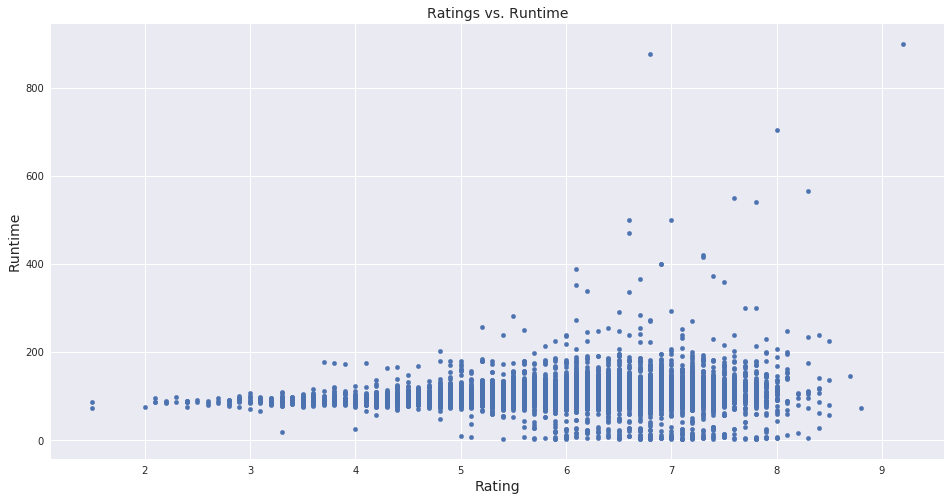

In [39]:
# Plot scatter plot of these two columns 
#figure size(width, height) 
df_tmdb.plot(x='vote_average', y='runtime', kind='scatter', figsize=(16,8))
#title of the plot
plt.title('Ratings vs. Runtime' , fontsize = 14)
#on x-axis 
plt.xlabel('Rating', fontsize = 14)
#on y-axis 
plt.ylabel('Runtime', fontsize = 14);

> From this scatter plot, we can observe several conclusions:
1. If the movie is short so it's likely to have mid to high rating.
2. The ratings of movie with a runtime of around 100 minutes are unpredictable, as they can run from low to high.
3. if the movie with a runtime that is above or below 100 minues it tend to have mid to high ratings.
4. Movies with long runtimes consistently get higher than average ratings.

<a id='Q12'></a>
### Research Question 12 (What are the most successful genres with respect to the profitable movies ?)

In [40]:
#function which will take any column as argument from which data is need to be extracted and keep track of count
def extract_data(column_name):
    #will take a column, and separate the string by '|'
    all_data = df_tmdb[column_name].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    all_data = pd.Series(all_data.split('|'))
    
    #this will us value in descending order
    count = all_data.value_counts(ascending = False)
    
    return count

In [41]:
#This will variable will store the geners value from a function
genre_count = extract_data('genres')
#shwoing top 10 values
genre_count.head(10)

Drama              4746
Comedy             3775
Thriller           2902
Action             2376
Romance            1708
Horror             1636
Adventure          1465
Crime              1353
Science Fiction    1221
Family             1214
dtype: int64

> Now let's see the graphical analysis of the genres in bar plot.

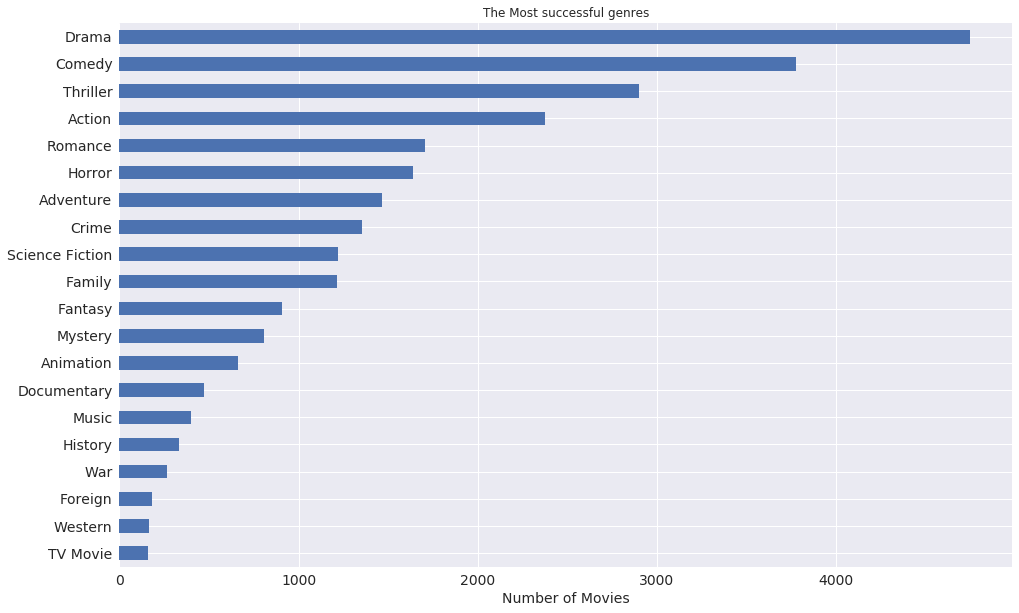

In [42]:
#we will present the data in ascending order from the top to  the bottom

genre_count.sort_values(ascending = True, inplace = True)

#initializing bar plot
bp = genre_count.plot.barh( fontsize = 14)
#title of the plot
bp.set(title = 'The Most successful genres')
#on x-axis 
bp.set_xlabel('Number of Movies', fontsize = '14')

#figure size(width, height) 
bp.figure.set_size_inches(16, 10)

#shwoing the plot
plt.show()


Drama, Comedy, Thriller, Action, and Romance genres are the top five as the most as successful genres but obviously, Drama takes the first place with 4746 movies with respect to the profits.

<a id='conclusions'></a>
## Conclusions

1. We provide a line plot to the represent the profits trends from year to year.
2. After that , we find out that 2009 was the year that had the highest profits  and 1993 was the year that had the lowest profits.

3.	The average profits for all movies which is (2.716501658598578e+17 $.) and we provide Kernel Density Estimation plot for the analysis.
4. The movie with highest profits earned, which is Fear Clinic. And The movie with the lowest profits earned, which is The Sentinel.
5.	The top ten movies with the highest profits are : Angus Thongs and Perfect Snogging, Fear Clinic, Death of a Superhero, Des Lendemains Qui Chantent, Max Manus, Penis Boy, Once upon a Time in Mumbaai, Edmond , Plastic and Delta Farce.
6. The movie with highest budget which is The Warrior's Way, The movie with the lowest budget which is Mr. Holmes.
7. The movie with the longest runtime which is The Story of Film: An Odyssey for 900 minutes. The movie with the shortest runtime which is Batman: Strange Days for 3 minutes.
8. The average duration for all movies is 102.73689619732785 minutes.
We saw two different visualizations plot and as we saw that the distribution of the both formed graphs is positively skewed or right skewed.
•	Most of the movies are timed between 90 to 119 minutes. 
•	By looking at both the plot and calculations, we can conclude that:
o	25% of movies have a runtime of less than 95 minutes.
o	50% of movies have a runtime of less than 109 minutes. (median)
o	75% of movies have a runtime of less than 119 minutes.

9. The average rating for all movies is 5.964709719504258 .
10. The top ten movies with the highest rating (vote average) are : The story of Film: An Odyssey, Black Mirror : White Christmas, Pink Floyd: Pulse, The At of Flight, A Personal Journey with Martin Scorsese Through American Movies, Dave Chappelle: Killin' Them Softly, Queen-Rock Montreal, The Shawshank Redemption, Rush: Beyond the Lighted Stage, The Jinx: The Life and Deaths of Robert Durst.
11. The most successful genres with respect to the profitable movies:
Drama              4746
Comedy             3775
Thriller           2902
Action             2376
Romance            1708
Horror             1636
Adventure          1465
Crime              1353
Science Fiction    1221
Family             1214
There are 20 unique movie genres but drama is the one that show an increasing trend all over  the years and takes the first place with 4746 movies with respect to the profits. 


<a id='limitations'></a>
## Limitiations
> The dataset contains zero and null values in some of the features. 

<a id='resources'></a>
## Resources :
    https://www.kaggle.com/tmdb/tmdb-movie-metadata
    http://pbpython.com/pandas_dtypes.html
    https://seaborn.pydata.org/generated/seaborn.barplot.html
    
        

In [173]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0